In [1]:
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf

In [3]:
# VGG16 - это известная архитектура нейронной сети, предназначенная для классификации изображений.
from tensorflow.keras.applications.vgg16 import VGG16 as Model

# Загружаем модель VGG16:
# - weights='imagenet' означает, что модель будет загружена с предобученными весами на датасете ImageNet.
model = Model(weights='imagenet', include_top=True)

model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

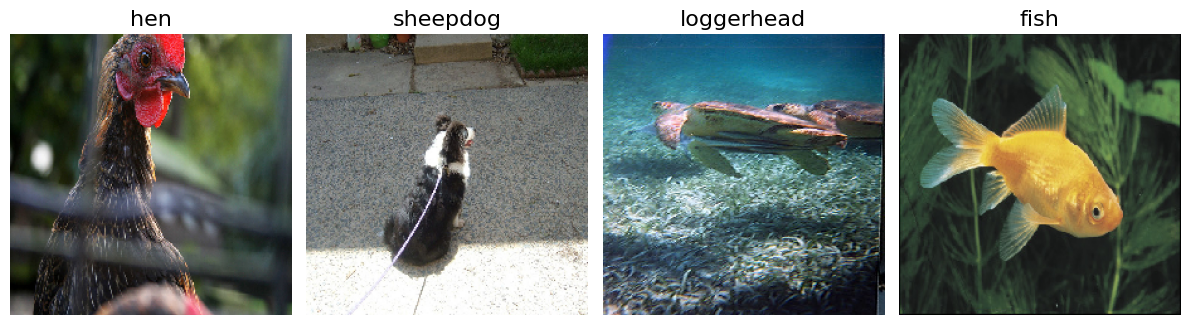

In [5]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
image_titles = ['hen', 'sheepdog', 'loggerhead', 'fish']

# Загружаем изображения и изменяем их размер до 224x224 пикселей (это размер, ожидаемый моделью VGG16)
img0 = load_img('hen.JPEG', target_size=(224, 224))
img1 = load_img('sheepdog.JPEG', target_size=(224, 224))
img2 = load_img('loggerhead.JPEG', target_size=(224, 224))
img3 = load_img('goldfish.JPEG', target_size=(224, 224))

# Преобразуем изображения в массивы NumPy для дальнейшей обработки
images = np.asarray([np.array(img0), np.array(img1), np.array(img2), np.array(img3)])

# Применяем предварительную обработку для изображений, чтобы они соответствовали ожиданиям модели VGG16
# Это включает в себя масштабирование пикселей, нормализацию и другие преобразования
X = preprocess_input(images)

# Создаем график с 1 строкой и 4 столбцами
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Для каждого изображения устанавливаем заголовок и показываем изображение
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок
    ax[i].imshow(images[i])  # Показываем изображение
    ax[i].axis('off')  # Убираем оси, чтобы они не мешали просмотру изображения

# Настроим расположение элементов на графике и отображаем его
plt.tight_layout()
plt.show()

In [6]:
# ReplaceToLinear — это утилита для модификации модели, заменяющая её последний слой на линейную активацию.
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

# Создаем объект для замены последнего слоя на линейную активацию.
replace2linear = ReplaceToLinear()
def model_modifier_function(cloned_model):
    # Здесь мы меняем активацию последнего слоя на линейную.
    # Это полезно, например, для визуализаций, когда не требуется применять активацию ReLU или Softmax
    cloned_model.layers[-1].activation = tf.keras.activations.linear


In [7]:
from tf_keras_vis.utils.scores import CategoricalScore

# Создаем объект CategoricalScore.
# В качестве аргумента передаем список индексов классов, для которых будем вычислять score.
# Здесь, например, передаем список [11, 12, 13, 14], что означает, что нас интересуют эти классы.
score = CategoricalScore([11, 12, 13, 14])

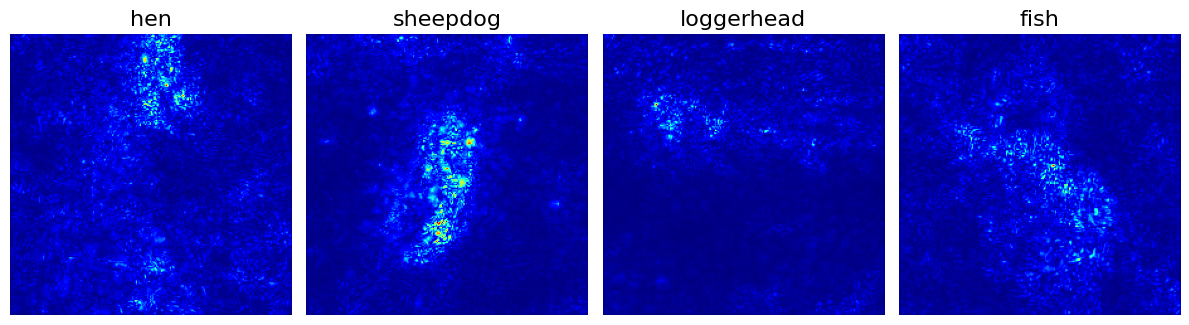

In [8]:
# Импортируем класс Saliency из библиотеки tf-keras-vis, который используется для создания карт важности (saliency maps).
# Saliency map показывает, какие части изображения наиболее важны для принятия решения моделью.
from tf_keras_vis.saliency import Saliency

# Инициализируем объект Saliency для визуализации важности:
saliency = Saliency(model, model_modifier=replace2linear, clone=True)

# Получаем карту важности (saliency map), используя ранее определенный score для классов [11, 12, 13, 14] и входные данные X.
saliency_map = saliency(score, X)

# Создаем подграфики для отображения карт saliency для всех 4 изображений.
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

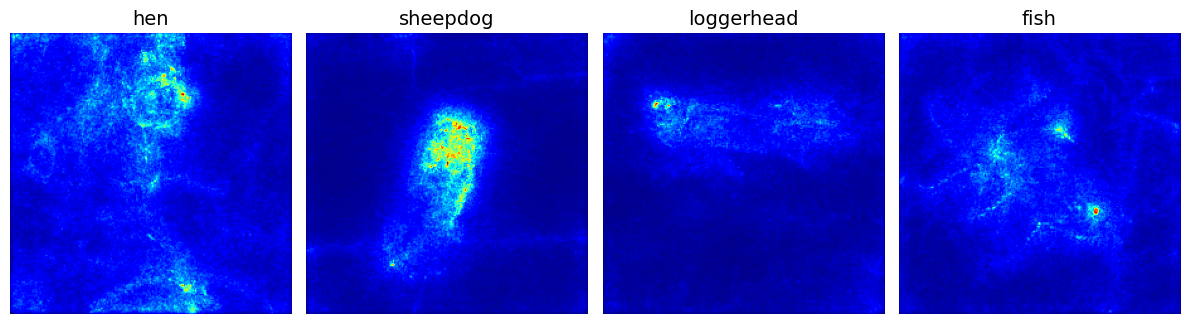

In [9]:
# Генерация карты важности (saliency map) с использованием SmoothGrad.
# SmoothGrad улучшает стандартный saliency map, добавляя случайный шум для сглаживания.
# - score — это наш объект.
# - X — это входные данные (изображения).
# - smooth_samples=20 — количество случайных образцов, которые будут добавлены для сглаживания.
# - smooth_noise=0.20 — уровень шума, который добавляется для сглаживания карты.
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.20)

# Создаем подграфики для отображения карт saliency для всех 4 изображений.
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')

# Плотно распределяем элементы на графике
plt.tight_layout()
plt.savefig('smoothgrad.png')
plt.show()

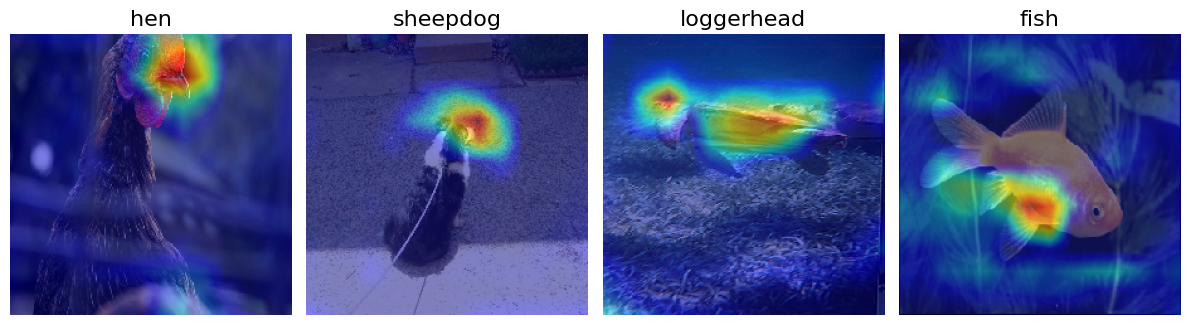

In [10]:
# Импортируем необходимые библиотеки:
# cm — для работы с цветовыми картами (цветовые схемы для визуализации).
# Gradcam — для использования метода Grad-CAM для визуализации важности различных частей изображения.
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Создаем объект Gradcam, который будет использоваться для генерации карт важности с помощью метода Grad-CAM:
gradcam = Gradcam(model, model_modifier=replace2linear, clone=True)

# Генерация карты активации Grad-CAM для выбранных классов (score) и входных изображений (X).
# - penultimate_layer=-1 указывает на использование предпоследнего слоя модели для вычислений Grad-CAM.
cam = gradcam(score, X, penultimate_layer=-1)

# Создаем подграфики для отображения Grad-CAM карт с наложением на оригинальные изображения.
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    # Используем цветовую карту 'jet', которая отображает важность пикселей в виде цветных оттенков.
    heatmap = np.uint8(cm.jet(cam[i])[..., :4] * 255)  # Преобразуем в формат [0, 255] для отображения
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    # Накладываем heatmap на оригинальное изображение с альфа-каналом для прозрачности.
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)  # alpha=0.5 для полупрозрачности карты
    ax[i].axis('off')

plt.tight_layout()
plt.show()

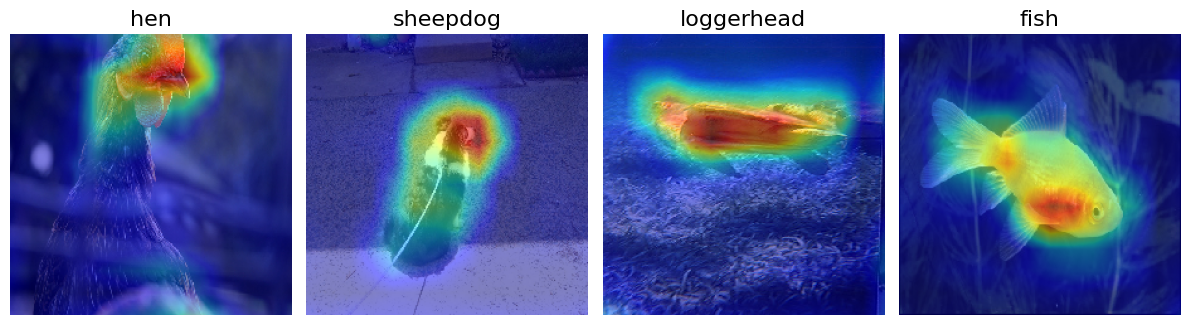

In [11]:
# GradcamPlusPlus — это улучшенная версия Grad-CAM, которая также использует градиенты для визуализации, но с добавлением дополнительных улучшений.
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

# Инициализируем объект GradcamPlusPlus для создания улучшенных карт активации:
gradcam = GradcamPlusPlus(model, model_modifier=replace2linear, clone=True)

# Генерация карты активации Grad-CAM++ (Class Activation Map) для заданных классов.
cam = gradcam(score, X, penultimate_layer=-1)

# Создаем подграфики для отображения Grad-CAM++ карт для всех 4 изображений.
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    # Преобразуем карту активации (cam) в формат, пригодный для отображения с использованием цветовой карты 'jet'
    heatmap = np.uint8(cm.jet(cam[i])[..., :4] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])

    # Накладываем тепловую карту (heatmap) на исходное изображение с прозрачностью alpha=0.5
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)  # alpha контролирует прозрачность наложения
    ax[i].axis('off')

plt.tight_layout()
plt.savefig('gradcam_plus_plus.png')
plt.show()